# <font color='#c38335'>Unidad II</font> 

# <font color='#323232'>Herramientas de Python para visualizaciones</font> 

## Creación de gráficos con Matplotlib
***
### <font color='#c38335'>Ejemplos</font>


# cambiar colores red and green!

In [2]:
# github.com/empathy87/storytelling-with-data/vertical-bar/figure-6-4.ipynb

import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

In [3]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [4]:
# # directors by year
X = ['Today\n9/30/15', 'FY16', 'FY17', 'FY18', 'FY19', 'FY20']
YA = np.array([0, -28, -44, -62, -77, -99]) # attrition
YT = np.array([190, 162, 146, 128, 113, 91]) # today
YP = np.array([0, 7, 10, 14, 16, 22]) # promoted
YQ = np.array([0, 4, 4, 4, 4, 4]) # acquisition
YU = np.array([0, 28, 50, 68, 91, 112]) # unmet gap

Text(-1.45, 280, 'Expected director population over time')

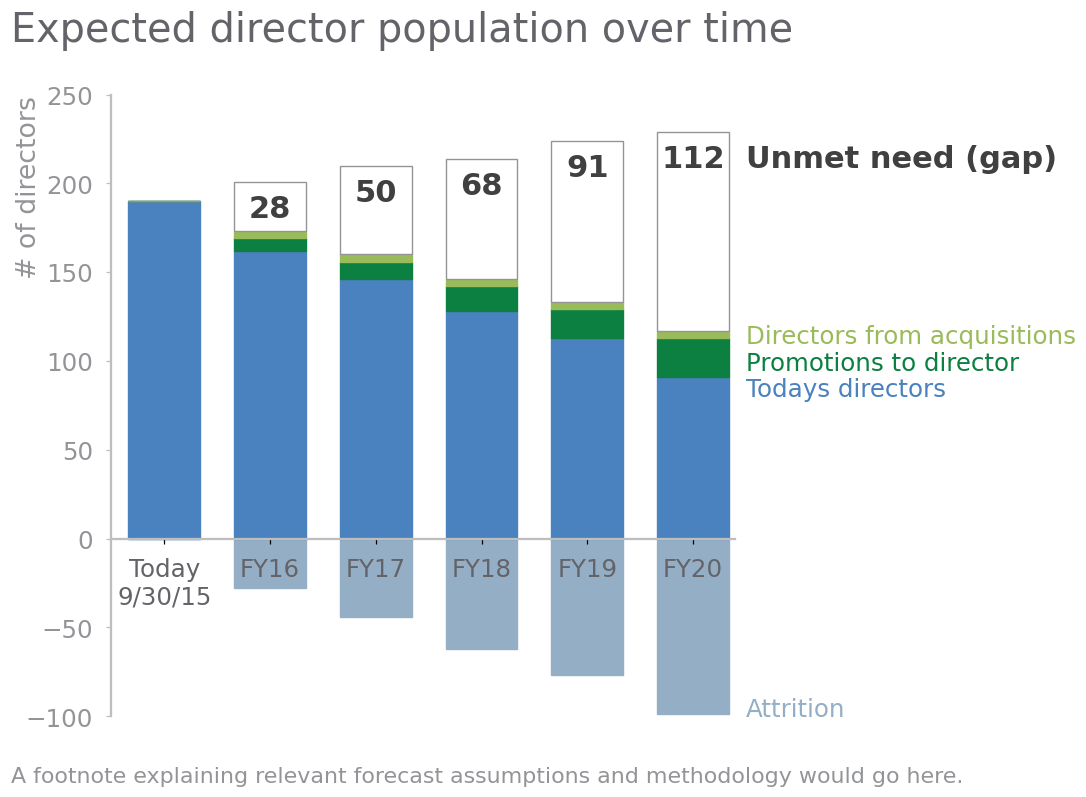

In [5]:
# create new figure
fig, ax1 = plt.subplots(figsize=(9.5, 7.2),  # width, height in inches
                        dpi=110)  # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.103, right=0.7, top=0.881, bottom=0.096)

# set the data limits for the y,x-axis
ax1.set_ylim([-100, 250])
ax1.set_xlim([-0.5, 5.4])
# move x axes to zero
ax1.spines['bottom'].set_position('zero')

plt.bar(list(range(0, 6)), YA, width=0.68, color=BLUE4, 
        edgecolor=BLUE4, linewidth=0.9)
plt.bar(list(range(0, 6)), YT, width=0.68, color=BLUE2, 
        edgecolor=BLUE2, linewidth=0.9)
plt.bar(list(range(0, 6)), YP, width=0.68, bottom=YT, color=GREEN1, 
        edgecolor=GREEN1, linewidth=0.9)
plt.bar(list(range(0, 6)), YQ, width=0.68, bottom=YT + YP, color=GREEN2, 
        edgecolor=GREEN2, linewidth=0.9)
white_bars = plt.bar(list(range(0, 6)), YU, width=0.68, bottom=YT + YP + YQ, 
                     color='white', edgecolor=GRAY7, linewidth=0.9)

# add numerical data labels for bars
for i, b in enumerate(white_bars):
    if YU[i] == 0:
        continue
    x = b.get_x() + b.get_width() / 2  # x-center of bar
    y = b.get_y() + b.get_height() - 20  # y-top of bar
    ax1.text(x, y,
             str(YU[i]),
             fontsize=20,
             fontweight='bold',
             horizontalalignment='center',
             color=GRAY2)

# add text for numerical data labels
ax1.text(5.5, y, 'Unmet need (gap)', fontsize=20, fontweight='bold', 
         color=GRAY2)

# add text labeling other bars
ax1.text(5.5, 110, 'Directors from acquisitions', fontsize=16, color=GREEN2)
ax1.text(5.5, 95, 'Promotions to director', fontsize=16, color=GREEN1)
ax1.text(5.5, 80, 'Today''s directors', fontsize=16, color=BLUE2)
ax1.text(5.5, -100, 'Attrition', fontsize=16, color=BLUE4)

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, xticks=list(range(0, 6)), xticklabels=X)

# remove chart border
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color(GRAY9)
ax1.spines['left'].set_color(GRAY9)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# change y ticks color
ax1.tick_params(axis='y', colors=GRAY9)
# hide x ticks
ax1.tick_params(bottom='off')

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    # use trasformations to shift y tick labels slightly left
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# title the axis
ax1.text(-1.4, 150, '# of directors', fontsize=17.5, rotation='vertical', 
         color=GRAY7)

# add footnote with the data source
plt.text(-1.45, -137,
         'A footnote explaining relevant forecast assumptions'
         ' and methodology would go here.',
         fontsize=14.5, color=GRAY7)

# title the plot
plt.text(-1.45, 280, 'Expected director population over time', 
         fontsize=26, color=GRAY4)

https://github.com/empathy87/storytelling-with-data/blob/master/horizontal-bar/figure-4-9.ipynb

In [6]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [7]:
# concerns and their distribution
X = ['Front seat audio/entertainment/navigation controls',
     'Bluetooth system is difficult to use',
     'Steering system/wheel has too much play',
     'Bluetooth system has poor sound quality',
     'Hesitation or delay when shifting',
     'Excessive wind noise',
     'Seat material concerns',
     'Engine makes abnormal/excessive noise',
     'Tires make excessive noise while driving',
     'Engine power is less than expected']
Y = [8.2, 8.6, 8.8, 10.0, 10.3, 11.0, 11.6, 11.6, 12.3, 12.9]

<>:46: SyntaxWarning: invalid escape sequence '\ '
<>:47: SyntaxWarning: invalid escape sequence '\ '
<>:51: SyntaxWarning: invalid escape sequence '\ '
<>:52: SyntaxWarning: invalid escape sequence '\ '
<>:54: SyntaxWarning: invalid escape sequence '\ '
<>:56: SyntaxWarning: invalid escape sequence '\ '
<>:46: SyntaxWarning: invalid escape sequence '\ '
<>:47: SyntaxWarning: invalid escape sequence '\ '
<>:51: SyntaxWarning: invalid escape sequence '\ '
<>:52: SyntaxWarning: invalid escape sequence '\ '
<>:54: SyntaxWarning: invalid escape sequence '\ '
<>:56: SyntaxWarning: invalid escape sequence '\ '
C:\Users\israe\AppData\Local\Temp\ipykernel_3260\2751745437.py:46: SyntaxWarning: invalid escape sequence '\ '
  '$\\bf{noisy\ tire\ issues}$|| are\n'
C:\Users\israe\AppData\Local\Temp\ipykernel_3260\2751745437.py:47: SyntaxWarning: invalid escape sequence '\ '
  'most apparent ||$\\bf{in\ the\ rain}$.\n'
C:\Users\israe\AppData\Local\Temp\ipykernel_3260\2751745437.py:51: SyntaxWarning:

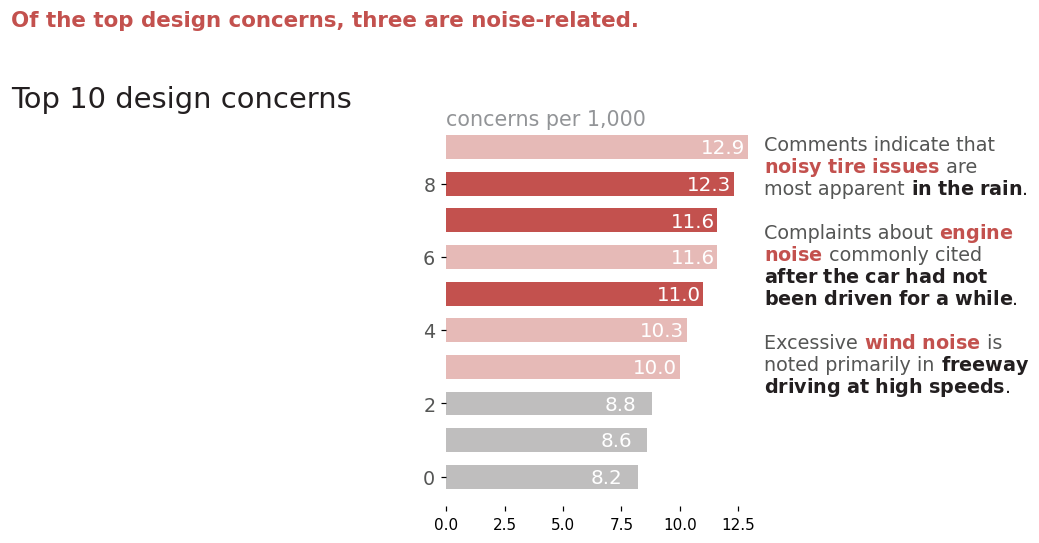

In [8]:
# create new figure
fig, ax1 = plt.subplots(figsize=(9, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# draw horizontal colored bars
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color=[GRAY9]*3 + [RED2]*2 + [RED1, RED2] + [RED1]*2 + [RED2])

# add numerical data labels for each bar
for i, b in enumerate(bars):
    plt.text(b.get_width() - 2, b.get_y() + 0.15,
             str(Y[i]),
             fontsize=13,
             color='white')

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, yticks=np.arange(len(X)), yticklabels=X)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off', left='off', labelbottom='off')

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# remove chart border
for spine in ax1.spines.values():
    spine.set_visible(False)

# title the plot
ax1.text(-18.6, 10.1, 'Top 10 design concerns', fontsize=19, color=GRAY1)
ax1.text(-18.6, 12.3, 'Of the top design concerns, three are noise-related.',
         fontsize=14, color=RED1, fontweight='bold')
ax1.text(0, 9.6, 'concerns per 1,000', fontsize='13.5', color=GRAY7)

# add text note with concerns description
rainbow_text(
    13.6, 2.3,
    'Comments indicate that\n'
    '$\\bf{noisy\ tire\ issues}$|| are\n'
    'most apparent ||$\\bf{in\ the\ rain}$.\n'
    ' \n'
    'Complaints about ||$\\bf{engine}$\n'
    '$\\bf{noise}$|| commonly cited\n'
    '$\\bf{after\ the\ car\ had\ not}$\n'
    '$\\bf{been\ driven\ for\ a\ while}$.\n'
    ' \n'
    'Excessive ||$\\bf{wind\ noise}$|| is\n'
    'noted primarily in ||$\\bf{freeway}$\n'
    '$\\bf{driving\ at\ high\ speeds}$.',
    [[GRAY3], [RED1, GRAY3], [GRAY3, GRAY1],
     [GRAY1],
     [GRAY3, RED1], [RED1, GRAY3], [GRAY1], [GRAY1],
     [GRAY1],
     [GRAY3, RED1, GRAY3], [GRAY3, GRAY1], [GRAY1]],
    spacing=22,
    ax=ax1,
    fontsize=12.5)

Tarea: Sacar los ticks del eje x.

<>:50: SyntaxWarning: invalid escape sequence '\ '
<>:51: SyntaxWarning: invalid escape sequence '\ '
<>:55: SyntaxWarning: invalid escape sequence '\ '
<>:56: SyntaxWarning: invalid escape sequence '\ '
<>:58: SyntaxWarning: invalid escape sequence '\ '
<>:60: SyntaxWarning: invalid escape sequence '\ '
<>:50: SyntaxWarning: invalid escape sequence '\ '
<>:51: SyntaxWarning: invalid escape sequence '\ '
<>:55: SyntaxWarning: invalid escape sequence '\ '
<>:56: SyntaxWarning: invalid escape sequence '\ '
<>:58: SyntaxWarning: invalid escape sequence '\ '
<>:60: SyntaxWarning: invalid escape sequence '\ '
C:\Users\israe\AppData\Local\Temp\ipykernel_3260\2310646013.py:50: SyntaxWarning: invalid escape sequence '\ '
  '$\\bf{noisy\ tire\ issues}$|| are\n'
C:\Users\israe\AppData\Local\Temp\ipykernel_3260\2310646013.py:51: SyntaxWarning: invalid escape sequence '\ '
  'most apparent ||$\\bf{in\ the\ rain}$.\n'
C:\Users\israe\AppData\Local\Temp\ipykernel_3260\2310646013.py:55: SyntaxWarning:

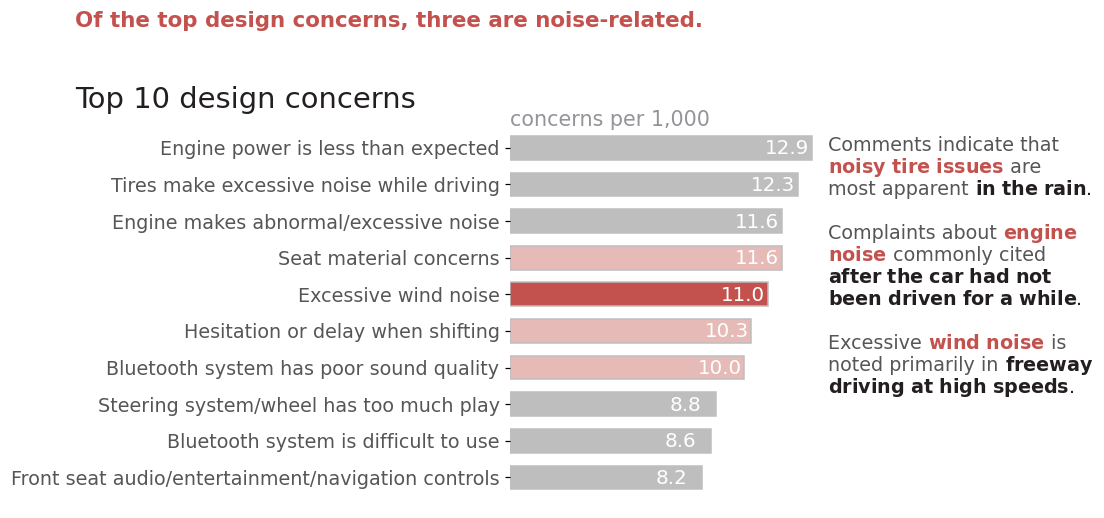

In [14]:
# create new figure
fig, ax1 = plt.subplots(figsize=(9, 4.65), dpi=110)  # width, height in inches

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# draw horizontal colored bars
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color=[GRAY9]*3 + [RED2]*2 + [RED1, RED2],
                edgecolor=GRAY9)  # Add edgecolor for bars

# add numerical data labels for each bar
for i, b in enumerate(bars):
    plt.text(b.get_width() - 2, b.get_y() + 0.15,
             str(Y[i]),
             fontsize=13,
             color='white')

# set properties for axes object (ticks for all issues with labels)
ax1.set_yticks(np.arange(len(X)))  # Set yticks
ax1.set_yticklabels(X)  # Set yticklabels

# remove ticks from x-axis
ax1.set_xticks([])

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off', left='off', labelbottom='off')

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# remove chart border
for spine in ax1.spines.values():
    spine.set_visible(False)

# title the plot
ax1.text(-18.6, 10.1, 'Top 10 design concerns', fontsize=19, color=GRAY1)
ax1.text(-18.6, 12.3, 'Of the top design concerns, three are noise-related.',
         fontsize=14, color=RED1, fontweight='bold')
ax1.text(0, 9.6, 'concerns per 1,000', fontsize='13.5', color=GRAY7)

# add text note with concerns description
rainbow_text(
    13.6, 2.3,
    'Comments indicate that\n'
    '$\\bf{noisy\ tire\ issues}$|| are\n'
    'most apparent ||$\\bf{in\ the\ rain}$.\n'
    ' \n'
    'Complaints about ||$\\bf{engine}$\n'
    '$\\bf{noise}$|| commonly cited\n'
    '$\\bf{after\ the\ car\ had\ not}$\n'
    '$\\bf{been\ driven\ for\ a\ while}$.\n'
    ' \n'
    'Excessive ||$\\bf{wind\ noise}$|| is\n'
    'noted primarily in ||$\\bf{freeway}$\n'
    '$\\bf{driving\ at\ high\ speeds}$.',
    [[GRAY3], [RED1, GRAY3], [GRAY3, GRAY1],
     [GRAY1],
     [GRAY3, RED1], [RED1, GRAY3], [GRAY1], [GRAY1],
     [GRAY1],
     [GRAY3, RED1, GRAY3], [GRAY3, GRAY1], [GRAY1]],
    spacing=22,
    ax=ax1,
    fontsize=12.5)

# show the plot
plt.show()


# Exercise 3.04: Working on Radar Charts


https://github.com/PacktWorkshops/The-Data-Visualization-Workshop/blob/master/Chapter03/Exercise3.04/Exercise3.04.ipynb

The-Data-Visualization-Workshop/Chapter03/Exercise3.04/Exercise3.04.ipynb

A radar chart is basically a line plot with a polar projection. There are two major things we have to do. First, we have to repeat the first values at the end to close the line. Second, we have to create a subplot with polar projection.

In [10]:
import pandas as pd

In [11]:
# Sample data
# Attributes: Efficiency, Quality, Commitment, Responsible Conduct, Cooperation
data = pd.DataFrame({
    'Employee': ['Alex', 'Alice', 'Chris', 'Jennifer'],
    'Efficiency': [5, 4, 4, 3,],
    'Quality': [5, 5, 3, 3],
    'Commitment': [5, 4, 4, 4],
    'Responsible Conduct': [4, 4, 4, 3],
    'Cooperation': [4, 3, 4, 5],
    'Comunication': [4, 5, 4, 4],
})

In [12]:
# Create angle values and close the plot.
attributes = list(data.columns[1:])
print(type(attributes))
#print(attributes)
values = list(data.values[:, 1:])
employees = list(data.values[:, 0])

angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
# Close the plot
angles += angles[:1]
values = np.asarray(values)
values = np.concatenate([values, values[:, 0:1]], axis=1)

<class 'list'>


[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989] [[5 5 5 4 4 4 5]
 [4 5 4 4 3 5 4]
 [4 3 4 4 4 4 4]]
[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989] [[4 5 4 4 3 5 4]
 [4 3 4 4 4 4 4]]
[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989] [[4 3 4 4 4 4 4]]
[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989] []


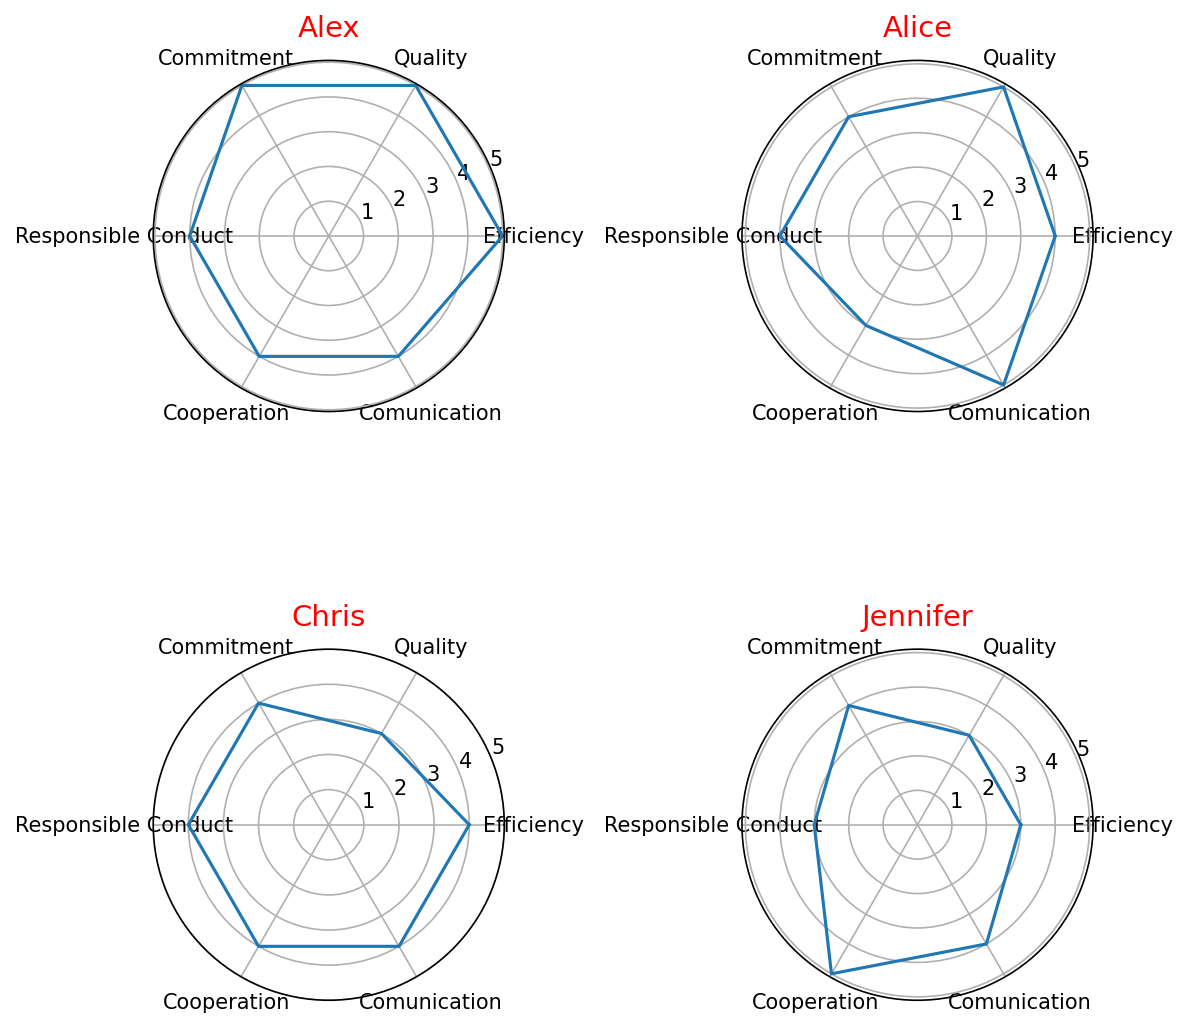

In [13]:
#Create subplots with polar projection. Set tight layout so nothing overlaps.
# Create figure
plt.figure(figsize=(8, 8), dpi=150)
# Create subplots
for i in range(4):
    ax = plt.subplot(2, 2, i + 1, polar=True)
    print(angles[:-1],values[i:-1])
    ax.plot(angles, values[i])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    ax.set_title(employees[i], fontsize=14, color='r')
# Set tight layout
plt.tight_layout()
# Show plot
plt.show()